### Customer Profiling

This activity is meant to give you practice exploring data including the use of visualizations with `matplotlib`, `seaborn`, and `plotly`.  The dataset contains demographic information on the customers, information on customer purchases, engagement of customers with promotions, and information on where customer purchases happened.  A complete data dictionary can be found below.  

Your task is to explore the data and use visualizations to inform answers to specific questions using the data.  The questions and resulting visualization should be posted in the group discussion related to this activity.  Some example problems/questions to explore could be:

-----

- Does income differentiate customers who purchase wine? 
- What customers are more likely to participate in the last promotional campaign?
- Are customers with children more likely to purchase products online?
- Do married people purchase more wine?
- What kinds of purchases led to customer complaints?

-----

### Data Dictionary

Attributes


```
ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if customer complained in the last 2 years, 0 otherwise


MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years
Promotion


AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


NumWebPurchases: Number of purchases made through the company’s web site
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s web site in the last month
```

### Imports

In [118]:
import warnings; warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [119]:
df = pd.read_csv('data/marketing_campaign.csv', sep = '\t')

In [120]:
df["IsTogether"] = (df.Marital_Status == "Married") | (df.Marital_Status == "Together")

In [121]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,IsTogether
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,False
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,False
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,True
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,True
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,True


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [123]:
columns_to_pairplot = ["Income", "MntWines", "MntFruits", "MntMeatProducts", "NumWebPurchases", "IsTogether"]
df_reduced = df[columns_to_pairplot]
df_reduced

,Income,MntWines,MntFruits,MntMeatProducts,NumWebPurchases,IsTogether
0,58138.0,635,88,546,8,False
1,46344.0,11,1,6,1,False
2,71613.0,426,49,127,8,True
3,26646.0,11,4,20,2,True
4,58293.0,173,43,118,5,True
...,...,...,...,...,...,...
2235,61223.0,709,43,182,9,True
2236,64014.0,406,0,30,8,True
2237,56981.0,908,48,217,2,False
2238,69245.0,428,30,214,6,True


In [124]:
numeric_columns = df_reduced.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'NumWebPurchases']

In [125]:
df_filtered = df_reduced.copy(deep=True)

for col in numeric_columns:
    prc_05 = df[col].quantile(0.05)
    prc_95 = df[col].quantile(0.95)
    df_filtered = df_filtered[(df_filtered[col] > prc_05) & (df_filtered[col] < prc_95)]

display(df_filtered)

,Income,MntWines,MntFruits,MntMeatProducts,NumWebPurchases,IsTogether
0,58138.0,635,88,546,8,False
2,71613.0,426,49,127,8,True
3,26646.0,11,4,20,2,True
4,58293.0,173,43,118,5,True
5,62513.0,520,42,98,6,True
...,...,...,...,...,...,...
2225,58554.0,368,24,68,8,True
2227,57967.0,229,7,137,4,False
2237,56981.0,908,48,217,2,False
2238,69245.0,428,30,214,6,True


### Pairplots

In [126]:
#sns.pairplot(df_filtered, hue="IsTogether")

In [132]:
import plotly.figure_factory as ff

### A distribution of amount spent on wine, colored by marital status

In [133]:
display(df.groupby("IsTogether")[numeric_columns].mean())

,Income,MntWines,MntFruits,MntMeatProducts,NumWebPurchases
IsTogether,,,,,
False,52088.945293,306.665829,27.611809,172.913317,4.084171
True,52334.264336,302.430748,25.580332,163.662742,4.085180


In [145]:
px.histogram(df_filtered, x="MntWines", color="IsTogether", title="Histogram of Wine Purchases by Marital Status", histnorm='percent')
# ff.create_distplot(
#     [
#         df_filtered.query("IsTogether == True")["MntWines"],
#         df_filtered.query("IsTogether == False")["MntWines"],
#     ],
#     group_labels=["MntWines-Together", "MntWines-Not Together"])

### What does a scatter of amount on wine versus income look like with IsTogether coloring

In [128]:
px.scatter(df_filtered, x="Income", y="MntWines", color="IsTogether")

In [129]:
display(df_filtered.corr(numeric_only=True))
#display(df.corr(numeric_only=True))

,Income,MntWines,MntFruits,MntMeatProducts,NumWebPurchases,IsTogether
Income,1.000000,0.709509,0.531255,0.710216,0.371211,0.004921
MntWines,0.709509,1.000000,0.416273,0.621188,0.471840,-0.013832
MntFruits,0.531255,0.416273,1.000000,0.584155,0.244028,-0.008199
MntMeatProducts,0.710216,0.621188,0.584155,1.000000,0.241340,-0.042568
NumWebPurchases,0.371211,0.471840,0.244028,0.241340,1.000000,0.017689
IsTogether,0.004921,-0.013832,-0.008199,-0.042568,0.017689,1.000000


### Conclusion 2 - Wine vs Meat Spending

In [147]:
px.scatter(df_filtered, x="MntMeatProducts", y="MntWines")

### Conclusion 1 - Amount Spent on Wine Increases with Income

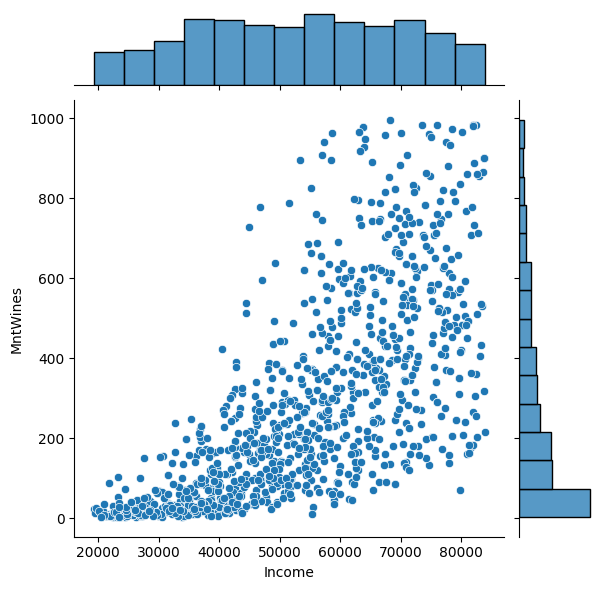

In [131]:
sns.jointplot(df_filtered, x="Income", y="MntWines")
# plt.figure()
# sns.jointplot(df_filtered.query("IsTogether == True"), x="Income", y="MntWines")

# plt.figure()
# sns.jointplot(df_filtered.query("IsTogether == False"), x="Income", y="MntWines")

### Pre-Processing
#### Filtered the data
I removed anything below 5th and above 95th percentils to make the graphs easier to interpret\
Unfortunately I iterated over columns with a for loop\
I need to dust off my filter / apply knowledge to filter all columns according to a function
#### Added Categorial Varable Is Married
I created a categorical variable IsTogether with True for status of Together or Married

### Conclusions
#### 1 - Amount spent on wine increases with income
#### 2 - Amount spent on wine correlates strongly with meat purchases (cc = 0.62), but trend is unclear